# Derivación numérica: diferencias finitas

### NOTA
Este notebook se iniciará en la clase; la resolución completa debe ser enviada como "Tarea3.ipynb", desde su carpeta de tareas. Se puede hacer en equipo, con un máximo de dos personas. Si se hace en equipo, incluyan ambos nombres de manera clara.

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la definición de la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

que requiere la especificación de `h`. (Este método se conoce por el nombre de *diferencias finitas*.)

A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). (Para ser concretos, obtengan la derivada de la función de prueba $f(x) = 3x^3-2$, en $x_0=1$.) Dibujen, como función de $h$, el error de su cálculo (usar escala logarítmica en ambos ejes puede ser una buena idea). A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada? 


In [1]:
f(x) = 3*x^3 - 2

f (generic function with 1 method)

In [2]:
derivf(xo) = (f(xo + h) - f(xo)) / h

derivf (generic function with 1 method)

In [3]:
#Prueba del comando linspace.
hi = linspace(-15.0, -1.0, 50)
h = 10.0.^(hi)

50-element Array{Float64,1}:
 1.0e-15    
 1.9307e-15 
 3.72759e-15
 7.19686e-15
 1.3895e-14 
 2.6827e-14 
 5.17947e-14
 1.0e-13    
 1.9307e-13 
 3.72759e-13
 7.19686e-13
 1.3895e-12 
 2.6827e-12 
 ⋮          
 7.19686e-5 
 0.00013895 
 0.00026827 
 0.000517947
 0.001      
 0.0019307  
 0.00372759 
 0.00719686 
 0.013895   
 0.026827   
 0.0517947  
 0.1        

In [4]:
#Definimos la función derivada derecha de f(x)!
f(x) = 3*x^3 - 2

function derivada_derecha(xo, h)

    derivf = (f(xo + h) - f(xo)) / h
    derivf
end

derivada_derecha (generic function with 1 method)

Pruebas de la función derivada derecha

In [5]:
derivada_derecha(1, 0.1)

9.930000000000012

In [6]:
derivada_derecha(1.0, 0.01)

9.090299999999996

In [7]:
derivada_derecha(2.0, 0.1)

37.83000000000001

In [8]:
derivada_derecha(1.0,0.0)

NaN

In [9]:
#Calculamos el error de la derivada derecha
hi = linspace(-15.0, -1.0, 50)
h = 10.0.^(hi)

v_error_derder = Array(Float64, length(h))   # similar(h)
for (i, hh) in enumerate(h)
    # 9.0 es el valor exacto de la derivada
    v_error_derder[i] = abs(derivada_derecha(1.0, hh) - 9.0)
end


In [10]:
#Arreglo de los errores
v_error_derder

50-element Array{Float64,1}:
 0.769963   
 0.200595   
 0.0543075  
 0.114337   
 0.0767718  
 0.00528978 
 0.0144267  
 0.0071935  
 0.00508262 
 0.00188787 
 0.000797599
 0.00038632 
 0.000158085
 ⋮          
 0.000647733
 0.0012506  
 0.00241464 
 0.00466233 
 0.009003   
 0.0173875  
 0.03359    
 0.0649271  
 0.125634   
 0.243602   
 0.474201   
 0.93       

In [11]:
using PyPlot

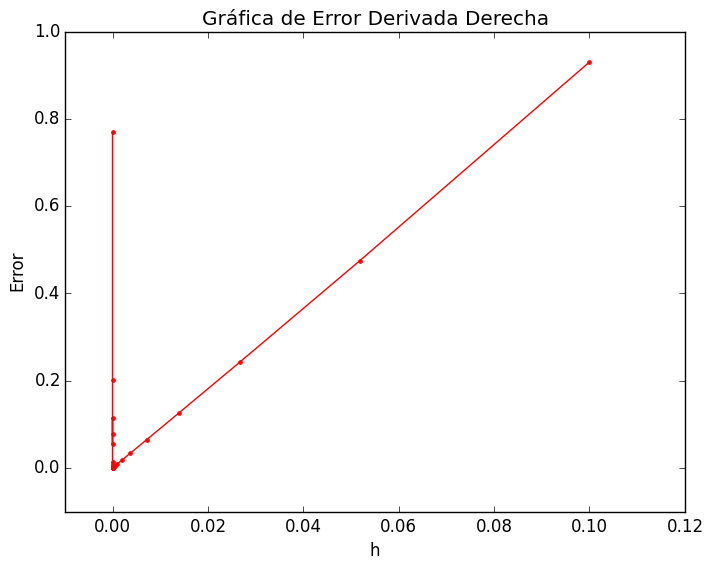

(-0.1,1.0)

In [12]:
#Graficamos los errores
plot(h, v_error_derder, "r.-");
title("Gráfica de Error Derivada Derecha")
xlabel("h")
ylabel("Error")
xlim(-0.01, 0.12)
ylim(-0.1, 1.0)

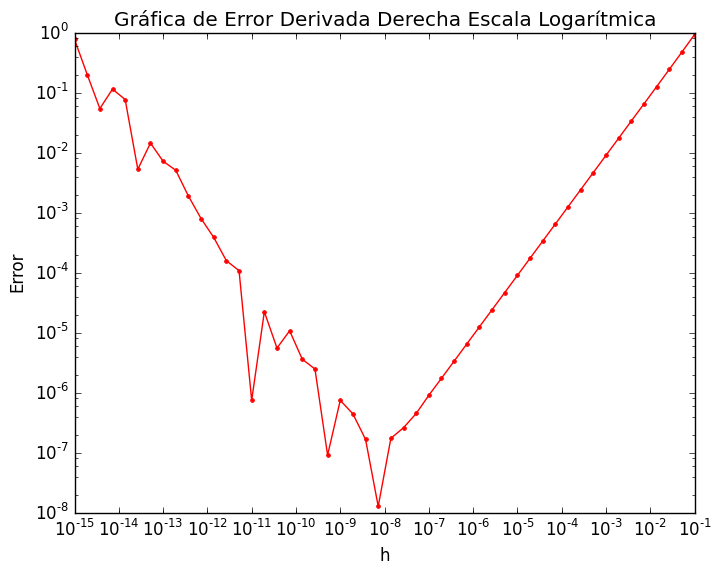

PyObject <matplotlib.text.Text object at 0x31ed44110>

In [13]:
#Graficando con escala logarítmica
loglog(h, v_error_derder, "r.-");
title("Gráfica de Error Derivada Derecha Escala Logarítmica")
xlabel("h")
ylabel("Error")


## Derivada simétrica

Repitan el ejercicio anterior usando cómo definición de la derivada la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}



In [14]:
#Definimos la función derivada simétrica!
f(x) = 3*x^3 - 2

function derivada_simetrica(xo, h)

    derivsimf = (f(xo + h) - f(xo - h)) / 2h
    derivsimf
end

derivada_simetrica (generic function with 1 method)

Pruebas de la función que acabamos de definir

In [15]:
derivada_simetrica(1.0, 0.1)

9.030000000000005

In [16]:
#Obteniendo el error de la derivada simétrica.
hs = linspace(-15.0, -1.0, 50)
h = 10.0.^(hs)

v_error_dersim = Array(Float64, length(h))   # similar(h)
for (k, hh) in enumerate(h)
    # 9.0 es el valor exacto de la derivada
    v_error_dersim[k] = abs(derivada_simetrica(1.0, hh) - 9.0)
end



In [17]:
#Obteniendo el arreglo de los errores de la derivada simétrica
v_error_dersim

50-element Array{Float64,1}:
 0.325873   
 0.0294196  
 0.0543075  
 0.0526306  
 0.0288311  
 0.00528978 
 0.00156571 
 0.00275261 
 0.00278247 
 0.00188787 
 0.000797599
 6.67149e-5 
 0.000158085
 ⋮          
 1.55293e-8 
 5.79177e-8 
 2.15907e-7 
 8.04808e-7 
 3.0e-6     
 1.11828e-5 
 4.16849e-5 
 0.000155384
 0.000579209
 0.00215906 
 0.00804809 
 0.03       

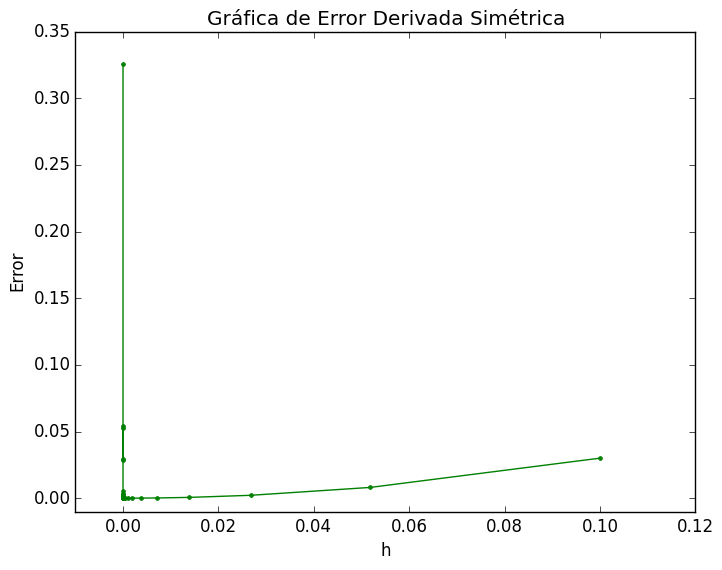

(-0.01,0.35)

In [18]:
#Graficando el error de la derivada simétrica.
plot(h, v_error_dersim, "g.-");
title("Gráfica de Error Derivada Simétrica")
xlabel("h")
ylabel("Error")
xlim(-0.01, 0.12)
ylim(-0.01, 0.35)


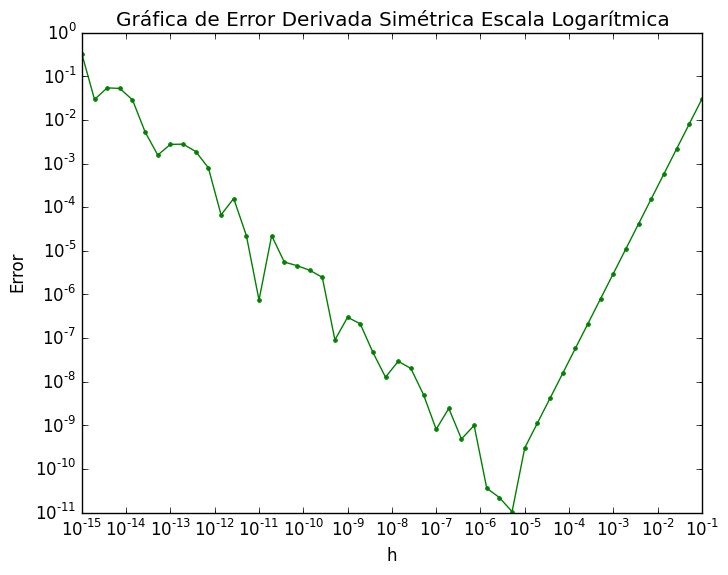

PyObject <matplotlib.text.Text object at 0x31f444290>

In [19]:
#Graficando el error usando la escala logarítmica.
loglog(h, v_error_dersim, "g.-");
title("Gráfica de Error Derivada Simétrica Escala Logarítmica")
xlabel("h")
ylabel("Error")



## Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Así, tenemos la definición:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [20]:
#Función de la derivada compleja!
f(x) = 3*x^3 - 2

function derivada_compleja(xo, h)

    deriv_compf = imag((f(xo + im*h)) / h)
    deriv_compf
end

derivada_compleja (generic function with 1 method)

In [21]:
#Prueba de la función.
derivada_compleja(1.0, 0.01)

8.9997

In [22]:
#Obteniendo los errores de la derivada compleja.
hc = linspace(-15.0, -1.0, 50)
h = 10.0.^(hc)

v_error_dercompl = Array(Float64, length(h))
for (j, hh) in enumerate(h)
    # 9.0 es el valor exacto de la derivada
    v_error_dercompl[j] = abs(derivada_compleja(1.0, hh) - 9.0)
end


In [23]:
#Obteniendo los errores de la derivada compleja.
v_error_dercompl

50-element Array{Float64,1}:
 0.0        
 1.77636e-15
 0.0        
 0.0        
 0.0        
 0.0        
 1.77636e-15
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 ⋮          
 1.55384e-8 
 5.79209e-8 
 2.15906e-7 
 8.04809e-7 
 3.0e-6     
 1.11828e-5 
 4.16849e-5 
 0.000155384
 0.000579209
 0.00215906 
 0.00804809 
 0.03       

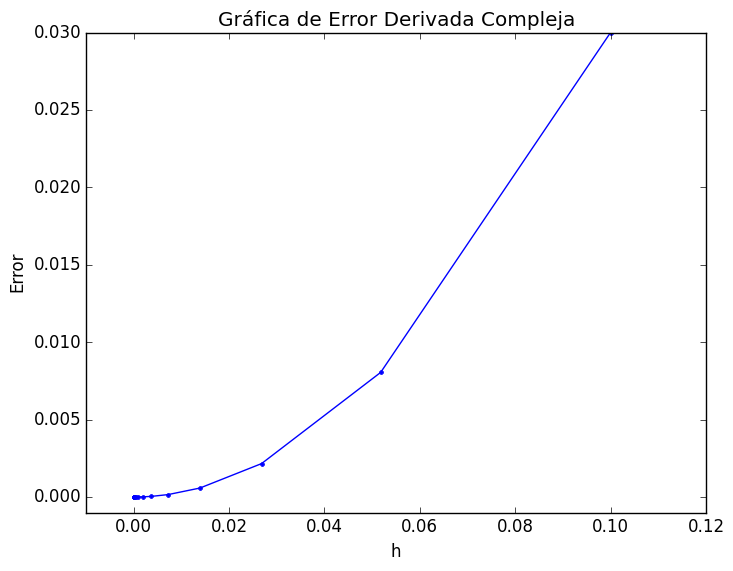

(-0.001,0.03)

In [24]:
#Graficando dichos errrores.
plot(h, v_error_dercompl, ".-");
title("Gráfica de Error Derivada Compleja")
xlabel("h")
ylabel("Error")
xlim(-0.01, 0.12)
ylim(-0.001, 0.030)

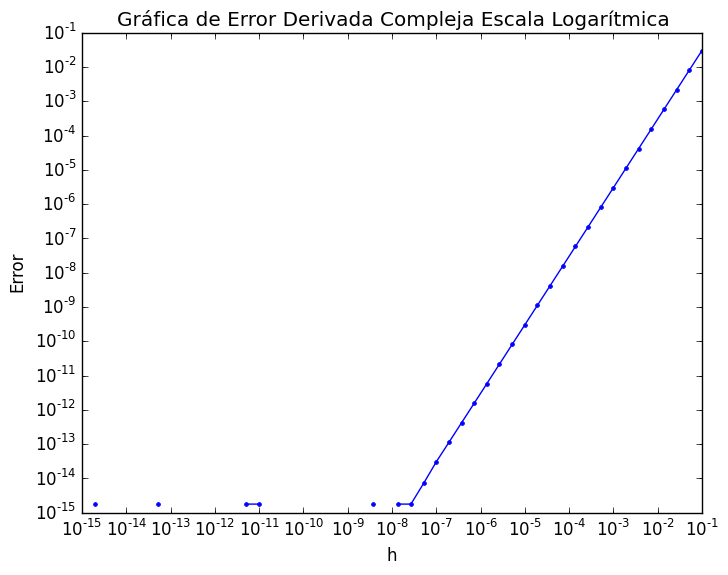

PyObject <matplotlib.text.Text object at 0x31fb342d0>

In [25]:
#Graficando en escala logarítmica los errores. 
loglog(h, v_error_dercompl, ".-");
title("Gráfica de Error Derivada Compleja Escala Logarítmica")
xlabel("h")
ylabel("Error")



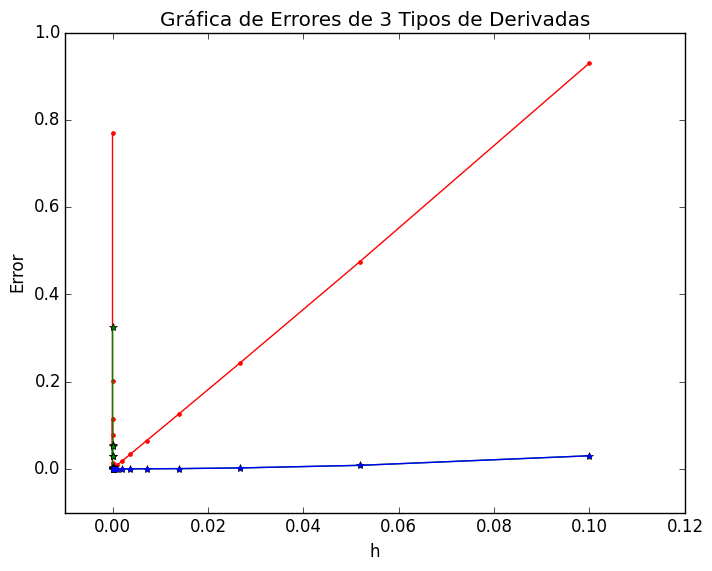

(-0.1,1.0)

In [26]:
#Gráfica de errores de los tres tipos de derivadas.
plot(h, v_error_derder, "r.-"); plot(h, v_error_dersim, "g*-"); plot(h, v_error_dercompl, ".-");
title("Gráfica de Errores de 3 Tipos de Derivadas")
xlabel("h")
ylabel("Error")


xlim(-0.01, 0.12)
ylim(-0.1, 1.0)

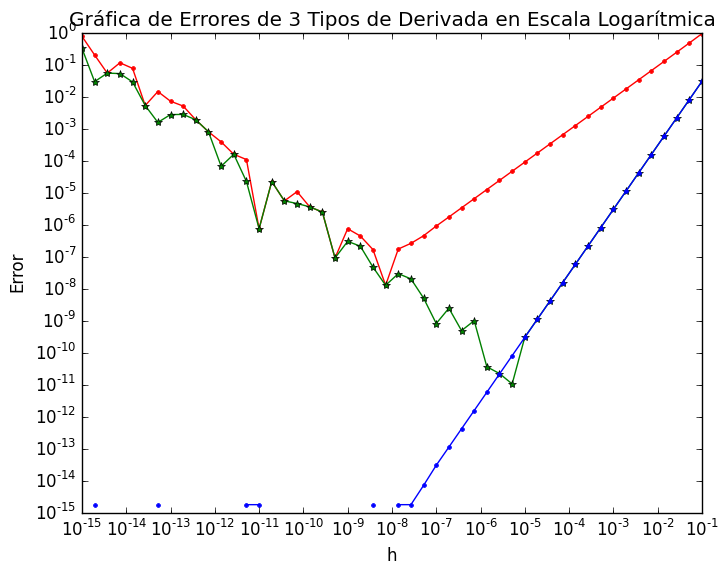

PyObject <matplotlib.text.Text object at 0x31feaaf50>

In [31]:
#Gráfica de los errores de los tres tipos de derivadas usando la escala logarítmica. 
#En rojo se muestran el error de la derivada derecha, en verde el error de la derivada simétrica y en azul el de la compleja.
loglog(h, v_error_derder, "r.-"); loglog(h, v_error_dersim, "g*-"); loglog(h, v_error_dercompl, "b.-");
title("Gráfica de Errores de 3 Tipos de Derivada en Escala Logarítmica")
xlabel("h")
ylabel("Error")


## Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

La derivada compleja es la que se aproxima mejor al valor exacto de la derivada de la función, el cual es *9.0*. En la gráfica anterior, de los errores se puede observar que la derivada compleja (azul) se acerca más al cero que los otros dos tipos de derivada. Es decir, los errores obtenidos con las derivadas derecha y simétrica llegan a ser del orden *10<sup>-8</sup>* y *10<sup>-11</sup>* respectivamente, mientras el error de la derivada compleja logra bajar hasta ser del orden de *10<sup>-15</sup>*. Además, se puede notar que el error de la derivada compleja en ningún momento empieza a aumentar.

- ¿Qué comportamiento de las derivadas en términos de $h$ nos incomoda (en lo más profundo de las entrañas)? ¿A qué se debe esto?

Conforme $h$ tiende a cero, el valor de la derivada no necesariamente se aproxima mejor al valor real de la derivada. De hecho, para la derivada derecha a partir de *$h$ < 10<sup>-8</sup>* y para la derivada simétrica a partir de *$h$ < 10<sup>-5</sup>* el error empieza a aumentar cada vez más. 
La razón de que este error no disminuya es la cancelación catastrófica, la cual se refiere a la pérdida de información (cifras significativas) al momento de sumar o restar números. Como consecuencia, al tener un proceso iterativo como en este caso, esa pérdida de información va aumentando con cada paso y por lo tanto entre menor sea $h$, al contrario de lo que se pensaría, la exactitud se va perdiendo.